In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

path = "/gpfs/adupuy/cosmicweb_asim/ASIM_TSC/samples/training/0.hdf5"


=== Non-zero summary ===
Total count      : 2097152
Non-zero count   : 14317
Non-zero ratio   : 0.006827

=== n_gal non-zero sample (first 20) ===
[0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727
 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727
 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.04545455
 0.02272727 0.02272727]

=== n_gal Non-zero Statistics ===
Min  : 2.272727e-02
Max  : 1.000000e+00
Mean : 2.757847e-02
Std  : 2.122742e-02


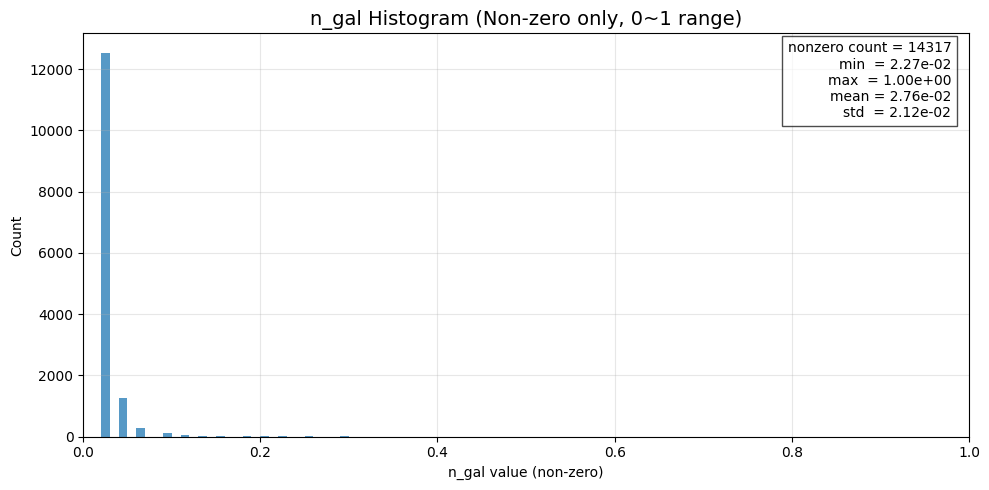

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

with h5py.File(path, "r") as f:
    input_data = f["input"][0]
n_gal = input_data[0]

n_gal_flat = n_gal.reshape(-1)

# ================================
# Remove zeros (exact 0)
# ================================
nonzero = n_gal_flat[n_gal_flat != 0]

print("=== Non-zero summary ===")
print(f"Total count      : {n_gal_flat.size}")
print(f"Non-zero count   : {nonzero.size}")
print(f"Non-zero ratio   : {nonzero.size / n_gal_flat.size:.6f}")

if nonzero.size == 0:
    print("\nAll values are zero. Nothing to show.")
else:
    # ================================
    # Show 20 non-zero samples
    # ================================
    print("\n=== n_gal non-zero sample (first 20) ===")
    print(nonzero[:20])

    # ================================
    # Stats on non-zero values
    # ================================
    nz_min  = np.min(nonzero)
    nz_max  = np.max(nonzero)
    nz_mean = np.mean(nonzero)
    nz_std  = np.std(nonzero)

    print("\n=== n_gal Non-zero Statistics ===")
    print(f"Min  : {nz_min:.6e}")
    print(f"Max  : {nz_max:.6e}")
    print(f"Mean : {nz_mean:.6e}")
    print(f"Std  : {nz_std:.6e}")

    # ================================
    # Histogram (non-zero only)
    # ================================
    plt.figure(figsize=(10, 5))
    plt.hist(nonzero, bins=100, range=(0, 1), alpha=0.75)

    plt.title("n_gal Histogram (Non-zero only, 0~1 range)", fontsize=14)
    plt.xlabel("n_gal value (non-zero)")
    plt.ylabel("Count")
    plt.xlim(0, 1)
    plt.grid(True, alpha=0.3)

    text = (
        f"nonzero count = {nonzero.size}\n"
        f"min  = {nz_min:.2e}\n"
        f"max  = {nz_max:.2e}\n"
        f"mean = {nz_mean:.2e}\n"
        f"std  = {nz_std:.2e}"
    )
    plt.annotate(
        text,
        xy=(0.98, 0.98), xycoords="axes fraction",
        ha="right", va="top",
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.7)
    )

    plt.tight_layout()
    plt.show()
